# Algoritmo de detección y classificación de Calderones Tropicales

## Introducción
Este 'notebook' contiene el prototipo del algoritmo de detección y classificación de Calderones Tropicales a partir de la identificación de su aleta dorsal.

El algoritmo consiste en dos fases:

1. Un primer modelo de detección de aletas dorsales en imágenes
2. Un segundo modelo para su identificación por individuo.

Los modelos han sido entrenados a partir de una recopilación de imágenes de Calderones Tropicales que contiene mas 1100 imagenes y un total de 9 individuos.

El modelo de detección de aletas tiene una precisiñon media (MAP50) de **98.9%**.

El model de identificación de 9 especies tiene una exactitud (Accuracy) de **95.6%**.

## Instrucciones de uso

1. Subir archivo centinela_prototype.zip al 'notebook' (arrastrar y soltar en el lado izquierdo)
2. Clickear en 'Runtime' -> 'Run all'
3. Esperar a que se cargue el contenido y observar las predicciones

## Definicion de librerias

In [ ]:
!pip install ultralytics -q
import os
import glob
from ultralytics import YOLO
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from tensorflow.keras.models import load_model
import numpy as np
from PIL import Image

## Descomprimiendo modelos e imagenes

In [ ]:
notebook_path= '/content'
if os.path.exists(os.path.join(notebook_path,'centinela_prototype.zip')):
  print('\nUnzipping centinela_prototype.zip file')
  !unzip -qq '/content/centinela_prototype.zip'
else:
  print('\nERROR: No se ha podido encontrar el archivo "centinela_prototype.zip" con los modelos y las imagenes')


Unzipping centinela_prototype.zip file


## Visualizando imagenes

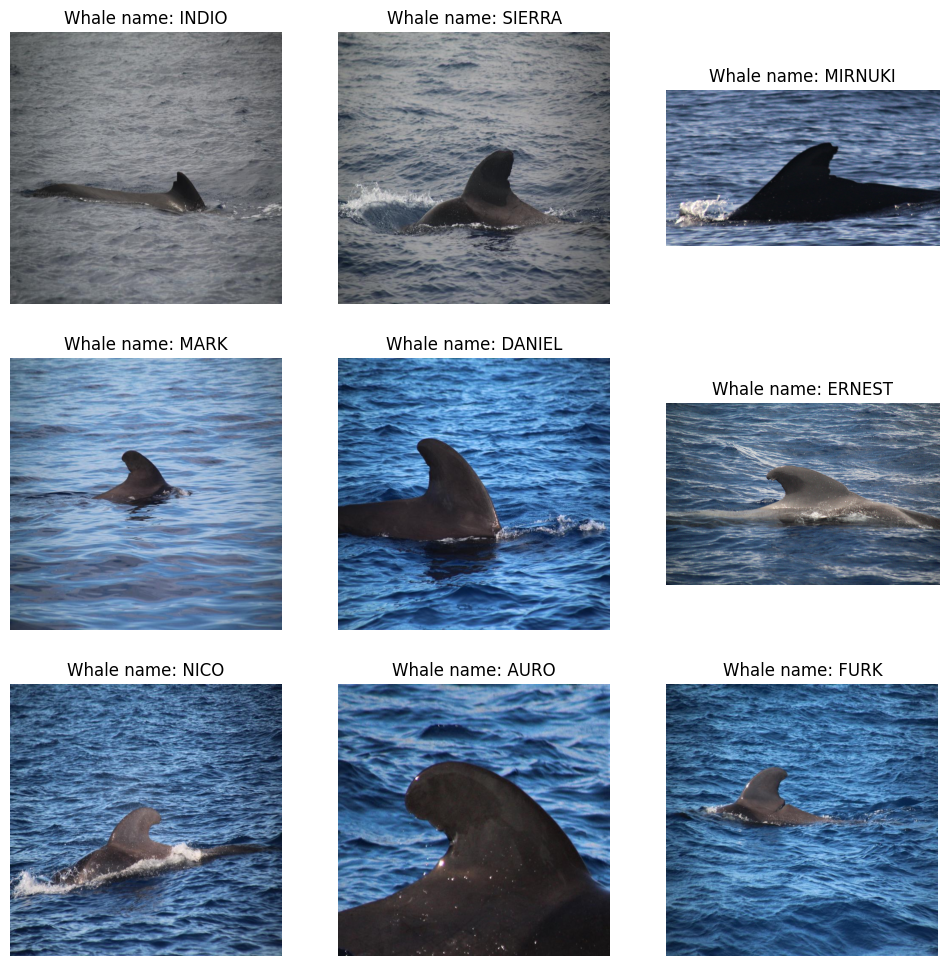

In [ ]:
test_files = glob.glob(f'/content/test_images_protoype/*.jpg')
num_rows = 3
num_cols = 3
fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 12))
# Loop through the images and plot them
for i, image_path in enumerate(test_files):
    row = i // num_cols
    col = i % num_cols
    ax = axes[row, col]

    img = Image.open(image_path)
    ax.imshow(img)
    ax.axis('off')
    ax.set_title(f'Whale id: {image_path.split("/")[-1].split(".jpg")[0]}')

plt.show()

## Deteccion de aletas dorsales

In [ ]:
!rm -r /content/runs/

In [ ]:
model = YOLO("/content/modelo_detection_aleta_dorsal.pt")
results = model.predict(source=test_files, save=True, save_crop=True, save_txt=True, show_conf=False, imgsz=640, conf=0.4, device='cpu', max_det=1, verbose=False)

Results saved to runs/detect/predict
9 labels saved to runs/detect/predict/labels


## Identificacion de aletas dorsales

In [ ]:
cropped_files = glob.glob(f'/content/runs/detect/predict/crops/fin/*jpg')
model = load_model('/content/modelo_identificacion_aleta_dorsal.h5')
whale_ids = ['AURO','DANIEL','ERNEST', 'FURK', 'INDIO', 'MARK', 'MIRNUKI','NICO','SIERRA']

predictions = []
for img in cropped_files:
    image = cv2.imread(img)
    image = cv2.resize(image, (224, 224)).astype('float32')
    image = np.expand_dims(image, axis=0)
    pred = np.argmax(model.predict(image,verbose=0))
    pred = whale_ids[pred]
    predictions.append(pred)

## Visualizacion de resultados

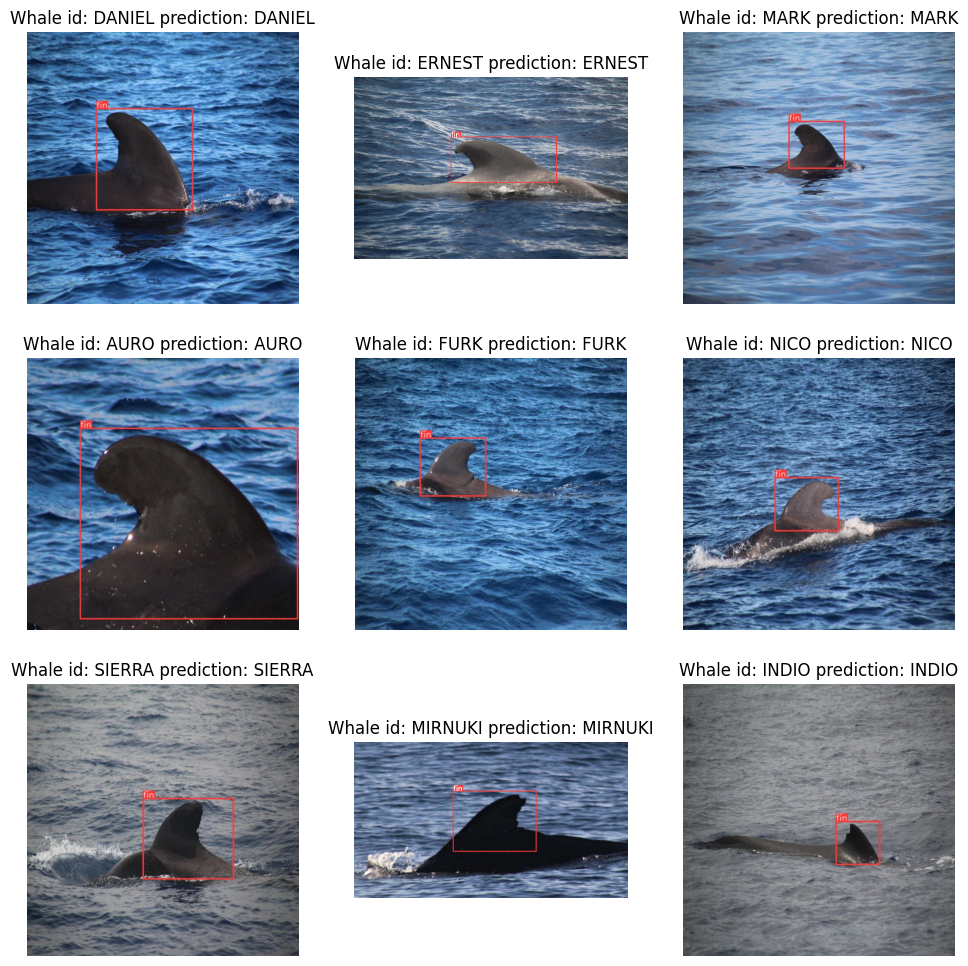

In [ ]:
test_files = glob.glob(f'/content/runs/detect/predict/*jpg')
num_rows = 3
num_cols = 3
fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 12))
# Loop through the images and plot them
for i, image_path in enumerate(test_files):
    row = i // num_cols
    col = i % num_cols
    ax = axes[row-1, col-1]

    img = Image.open(image_path)
    ax.imshow(img)
    ax.set_title(f'Whale id: {image_path.split("/")[-1].split(".jpg")[0]} prediction: {predictions[i]}')
    ax.axis('off')

plt.show()